In [5]:
import os
import copy, math
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.datasets import load_boston
# load dataset 
boston = load_boston()
type(boston)

sklearn.utils.Bunch

In [8]:
# print the feature names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
# print the data shape
print(boston.data.shape)

(506, 13)


Attribute Information (in order):
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [11]:
#print(boston.DESCR)

In [12]:
print(boston.target.shape)

(506,)


In [13]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [14]:
df.head() # this data is from 1978

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [16]:
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [24]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[boston.feature_names], df['target'], test_size=0.2, random_state=101)

In [25]:
X_train

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE      DIS   RAD    TAX  \
288  0.04590  52.5   5.32   0.0  0.405  6.315  45.6   7.3172   6.0  293.0   
72   0.09164   0.0  10.81   0.0  0.413  6.065   7.8   5.2873   4.0  305.0   
471  4.03841   0.0  18.10   0.0  0.532  6.229  90.7   3.0993  24.0  666.0   
176  0.07022   0.0   4.05   0.0  0.510  6.020  47.2   3.5549   5.0  296.0   
320  0.16760   0.0   7.38   0.0  0.493  6.426  52.3   4.5404   5.0  287.0   
..       ...   ...    ...   ...    ...    ...   ...      ...   ...    ...   
63   0.12650  25.0   5.13   0.0  0.453  6.762  43.4   7.9809   8.0  284.0   
326  0.30347   0.0   7.38   0.0  0.493  6.312  28.9   5.4159   5.0  287.0   
337  0.03041   0.0   5.19   0.0  0.515  5.895  59.6   5.6150   5.0  224.0   
11   0.11747  12.5   7.87   0.0  0.524  6.009  82.9   6.2267   5.0  311.0   
351  0.07950  60.0   1.69   0.0  0.411  6.579  35.9  10.7103   4.0  411.0   

     PTRATIO       B  LSTAT  
288     16.6  396.90   7.60  
72      19.2  390.91   5.52  
471     20.2  395.33  12.87  
176     16.6  393.23  10.11  
320     19.6  396.90   7.20  
..       ...     ...    ...  
63      19.7  395.58   9.50  
326     19.6  396.90   6.15  
337     20.2  394.81  10.56  
11      15.2  396.90  13.27  
351     18.3  370.78   5.49  

[404 rows x 13 columns]

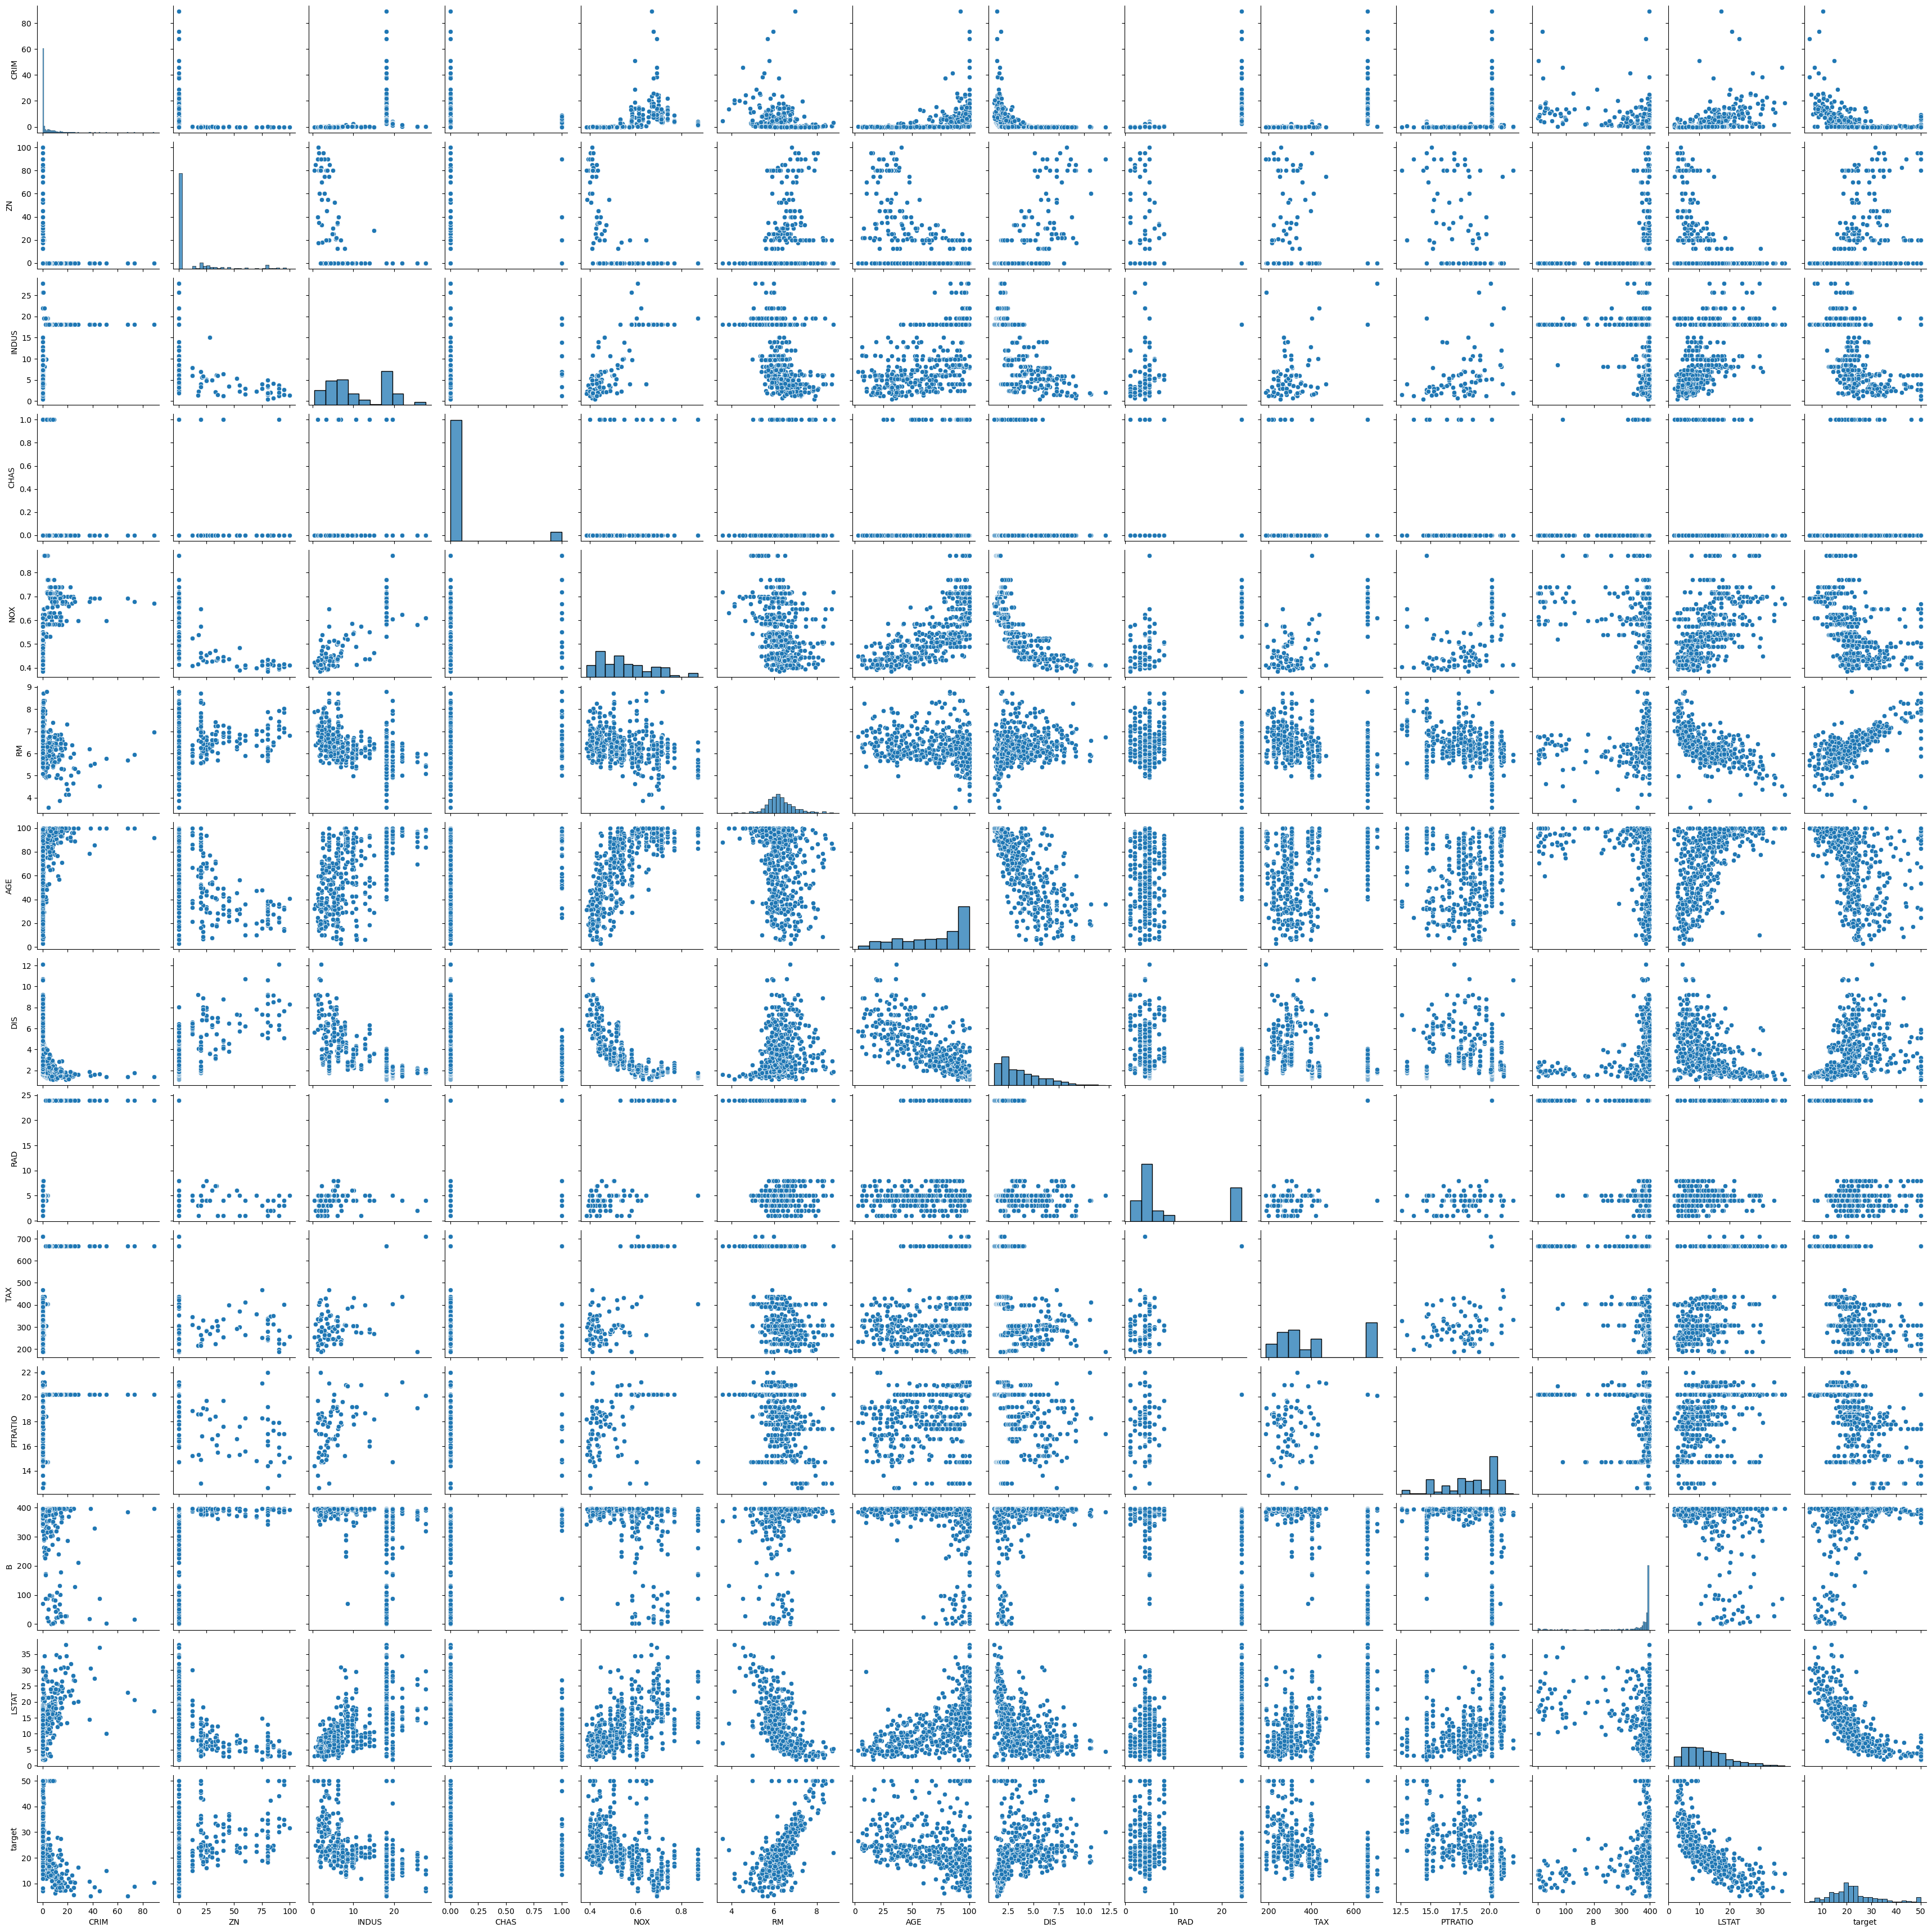

In [37]:
sns.pairplot(df)

<AxesSubplot:>

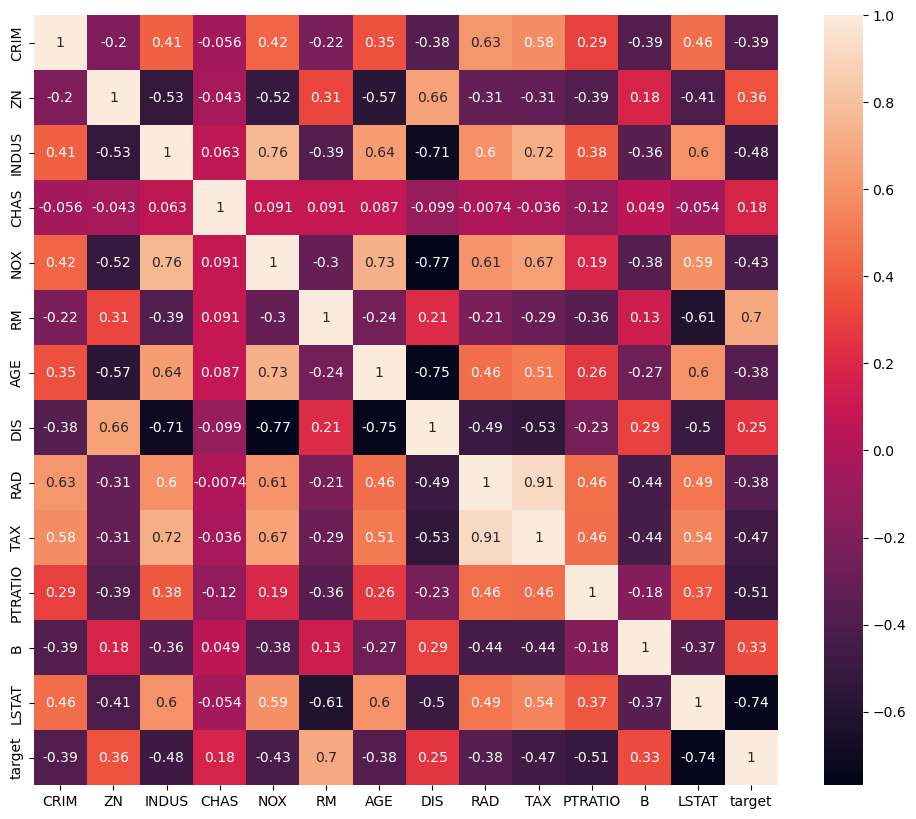

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [26]:
from sklearn.linear_model import LinearRegression

In [29]:
mdl = LinearRegression()

In [30]:
mdl.fit(X_train, y_train)

LinearRegression()

In [31]:
print(mdl.intercept_)

32.90613090863762


In [32]:
coef_df = pd.DataFrame(mdl.coef_, X_train.columns, columns = ['Coefficient'])
coef_df

Coefficient
CRIM       -0.098991
ZN          0.042505
INDUS       0.016739
CHAS        3.064379
NOX       -15.646253
RM          4.018884
AGE        -0.000832
DIS        -1.446280
RAD         0.267827
TAX        -0.010473
PTRATIO    -0.888652
B           0.008253
LSTAT      -0.549367

In [33]:
predictions = mdl.predict(X_test)

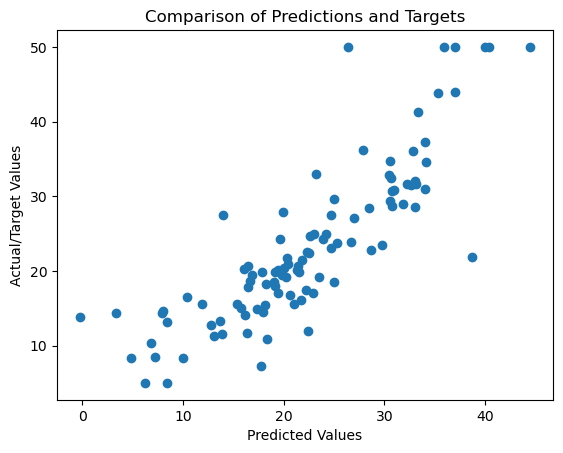

In [36]:
plt.scatter(predictions, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual/Target Values')
plt.title('Comparison of Predictions and Targets')
plt.show()

In [39]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 3.999404253053876
MSE 33.26891855791983
RMSE 5.767921511074837


# Diabetes dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

- Number of Instances:
442

- Number of Attributes:
First 10 columns are numeric predictive values

- Target:
Column 11 is a quantitative measure of disease progression one year after baseline

- Attribute Information:

- age age in years

- sex

- bmi body mass index

- bp average blood pressure

- s1 tc, total serum cholesterol

- s2 ldl, low-density lipoproteins

- s3 hdl, high-density lipoproteins

- s4 tch, total cholesterol / HDL

- s5 ltg, possibly log of serum triglycerides level

- s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of n_samples (i.e. the sum of squares of each column totals 1).

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [41]:
from sklearn.datasets import load_diabetes
# load dataset 
diabetes = load_diabetes()
type(diabetes)

sklearn.utils.Bunch

In [42]:
# print the feature names
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [43]:
# print the data shape
print(diabetes.data.shape)

(442, 10)


In [46]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [47]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [48]:
df.head() 

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [50]:
df['target'] = diabetes.target
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

In [52]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[diabetes.feature_names], df['target'], test_size=0.2, random_state=101)

In [53]:
X_train

age       sex       bmi        bp        s1        s2        s3  \
64   0.067136  0.050680 -0.025607 -0.040099 -0.063487 -0.059873 -0.002903   
257 -0.027310  0.050680 -0.055785  0.025315 -0.007073 -0.023547  0.052322   
118 -0.056370  0.050680 -0.010517  0.025315  0.023198  0.040022 -0.039719   
287  0.045341 -0.044642 -0.006206 -0.015999  0.125019  0.125198  0.019187   
157 -0.001882  0.050680 -0.033151 -0.018294  0.031454  0.042840 -0.013948   
..        ...       ...       ...       ...       ...       ...       ...   
63  -0.034575 -0.044642 -0.037463 -0.060757  0.020446  0.043466 -0.013948   
326  0.045341  0.050680 -0.008362 -0.033214 -0.007073  0.001191 -0.039719   
337  0.019913  0.050680 -0.012673  0.070073 -0.011201  0.007141 -0.039719   
11   0.027178  0.050680  0.017506 -0.033214 -0.007073  0.045972 -0.065491   
351 -0.085430  0.050680 -0.040696 -0.033214 -0.081374 -0.069580 -0.006584   

           s4        s5        s6  
64  -0.039493 -0.019197  0.011349  
257 -0.039493 -0.005145 -0.050783  
118  0.034309  0.020612  0.056912  
287  0.034309  0.032433 -0.005220  
157  0.019917  0.010226  0.027917  
..        ...       ...       ...  
63  -0.002592 -0.030751 -0.071494  
326  0.034309  0.029936  0.027917  
337  0.034309  0.005384  0.003064  
11   0.071210 -0.096433 -0.059067  
351 -0.039493 -0.057800 -0.042499  

[353 rows x 10 columns]

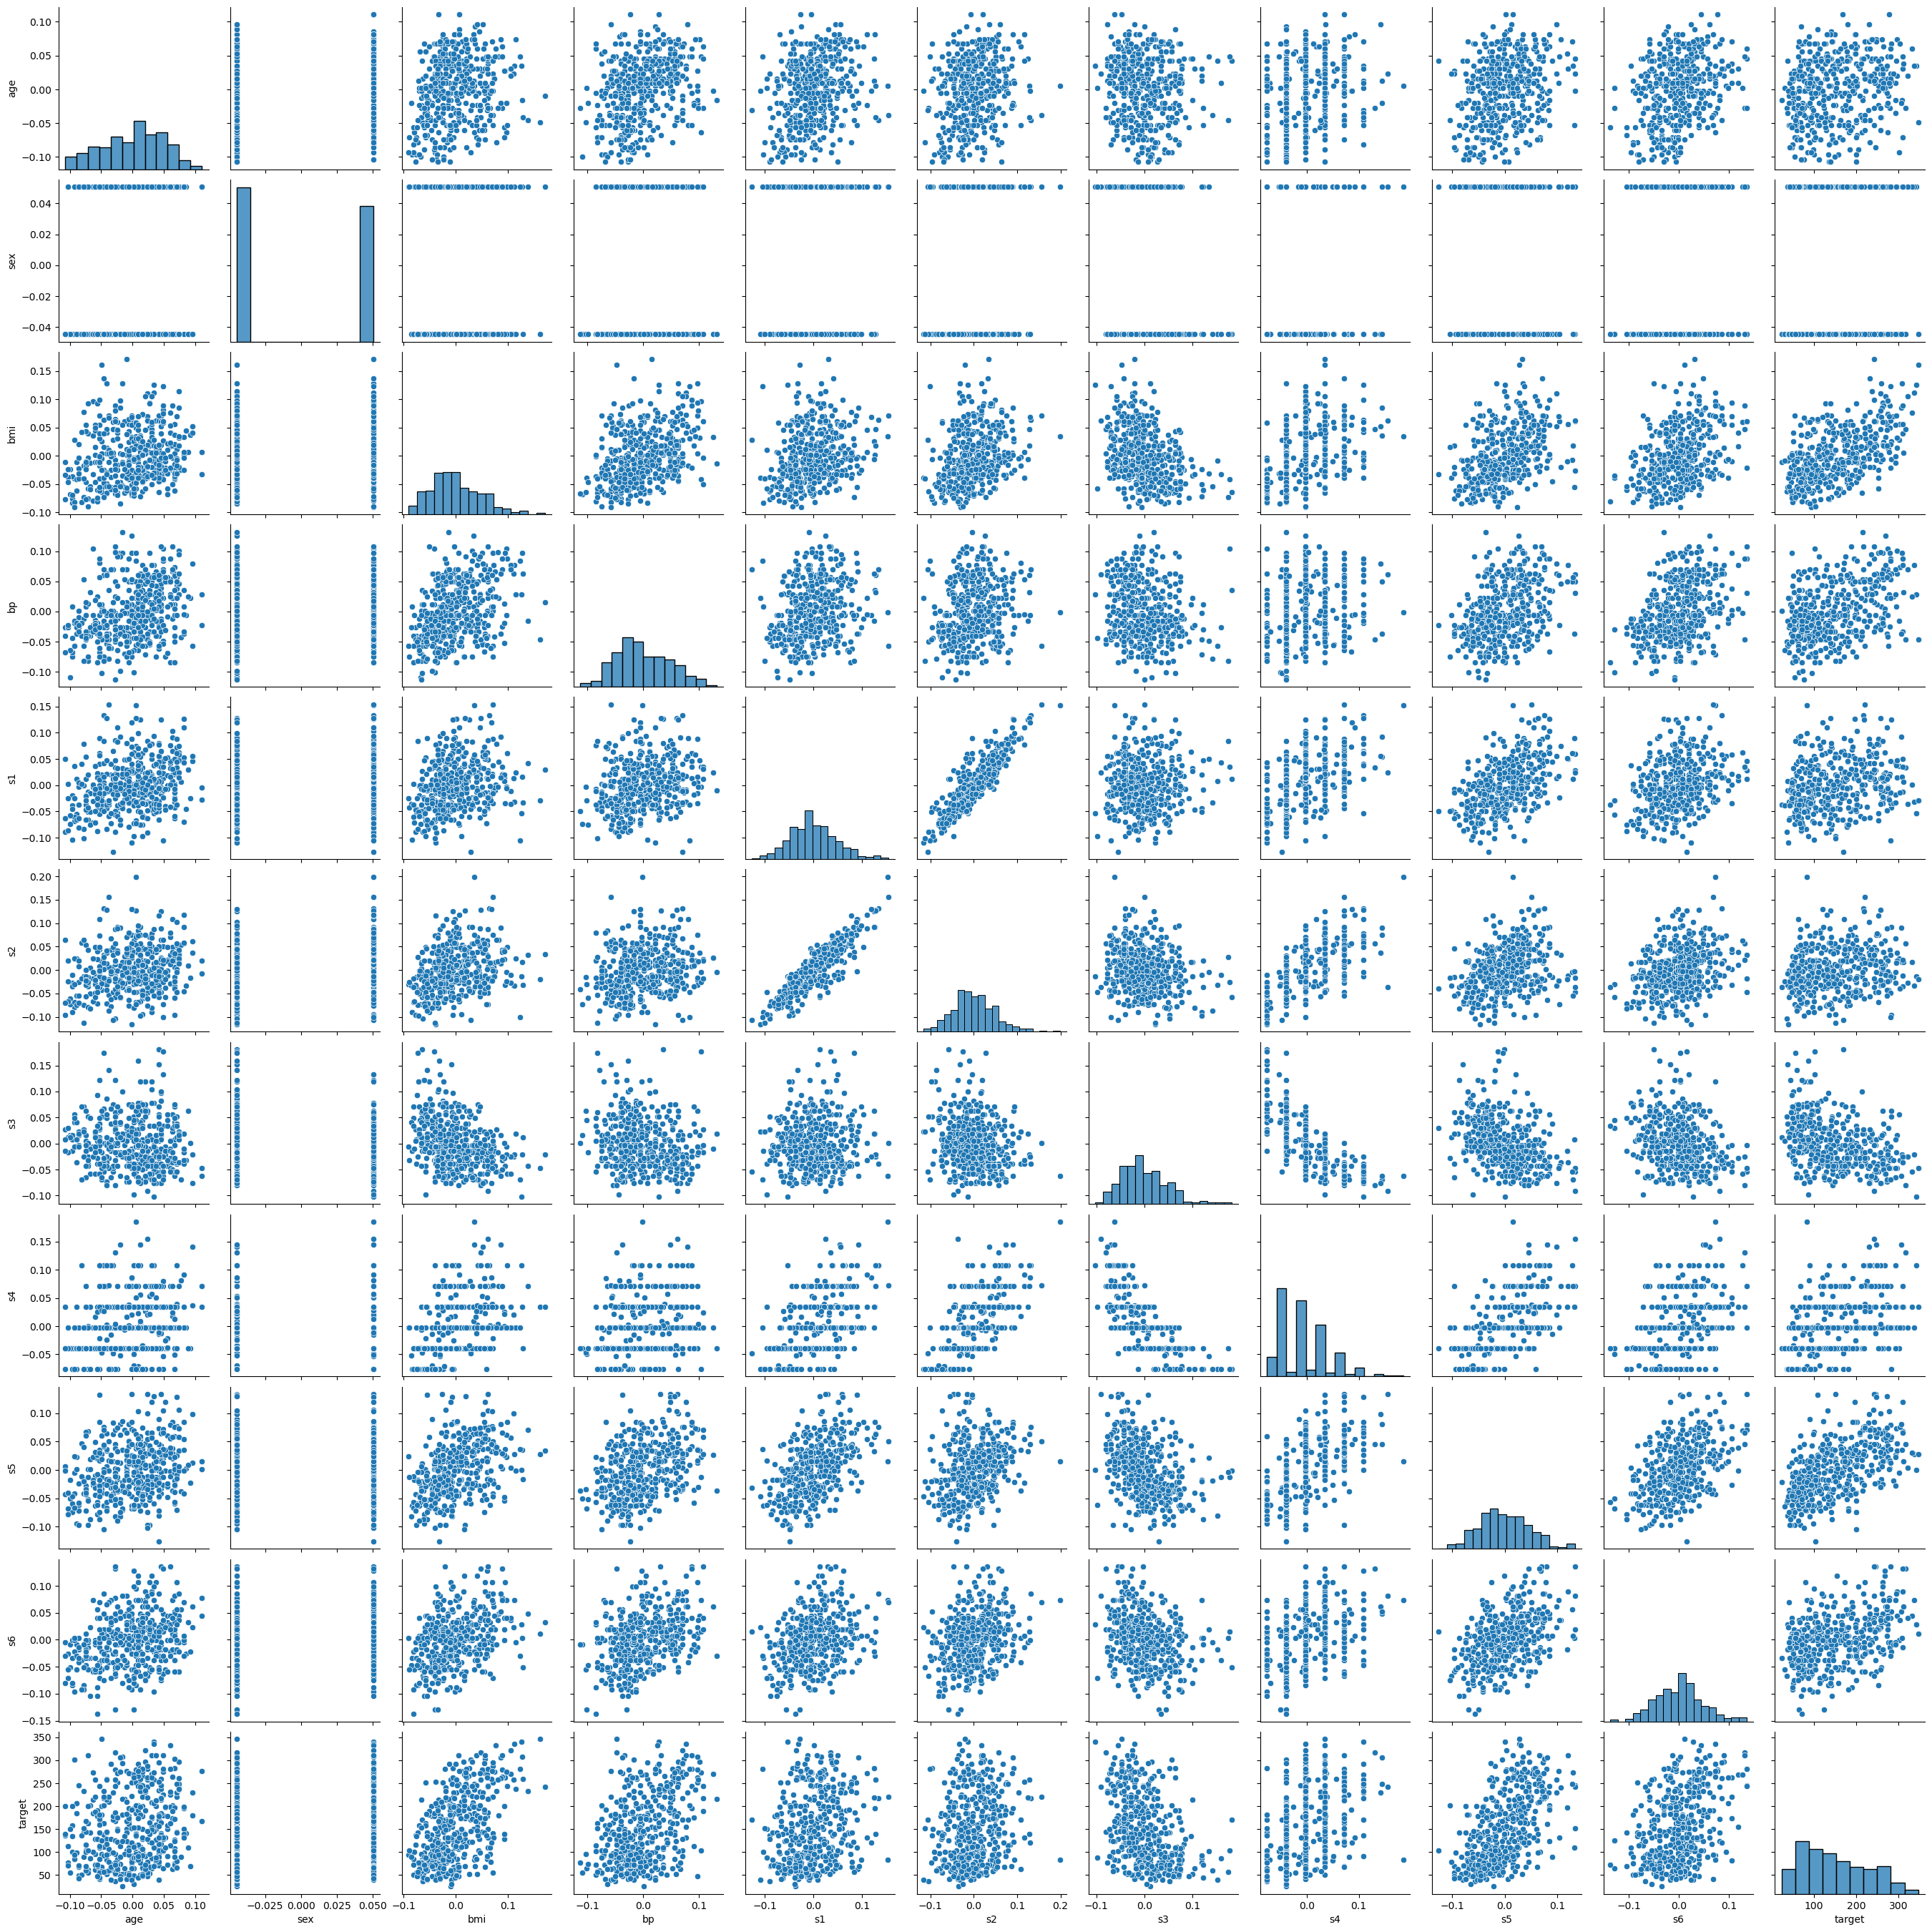

In [54]:
sns.pairplot(df)

<AxesSubplot:>

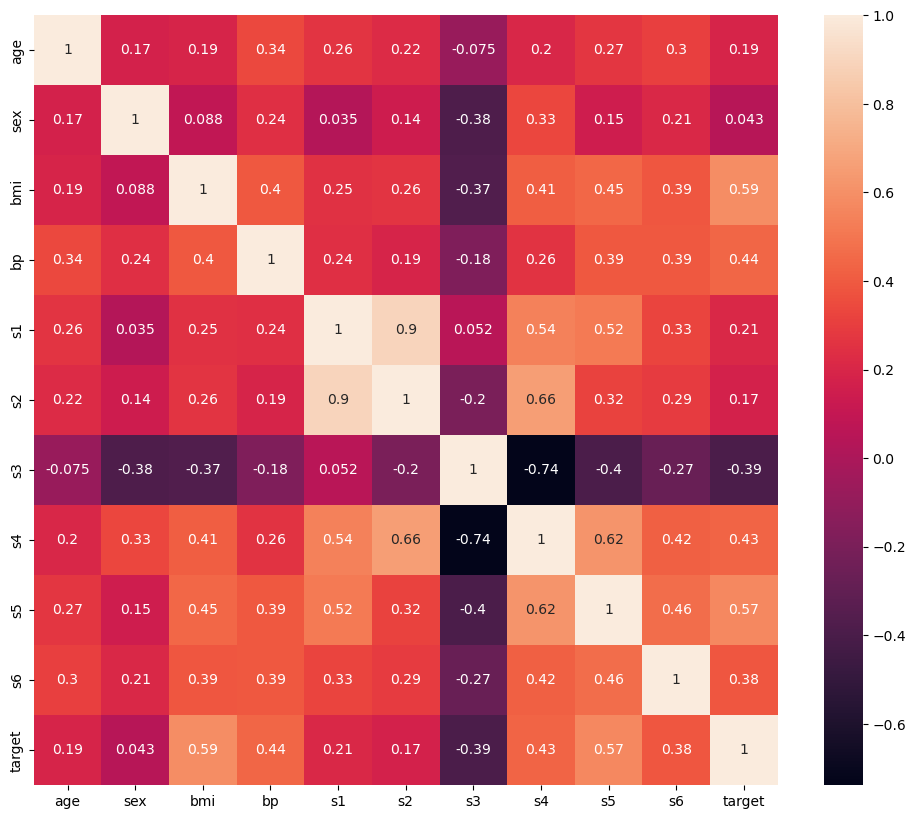

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
mdl = LinearRegression()

In [58]:
mdl.fit(X_train, y_train)

LinearRegression()

In [59]:
print(mdl.intercept_)

151.70363445605867


In [60]:
coef_df = pd.DataFrame(mdl.coef_, X_train.columns, columns = ['Coefficient'])
coef_df

Coefficient
age    -9.419689
sex  -252.581845
bmi   534.641709
bp    307.386735
s1   -600.467492
s2    318.566976
s3     61.475700
s4    193.134482
s5    703.513274
s6     34.186607

In [61]:
predictions = mdl.predict(X_test)

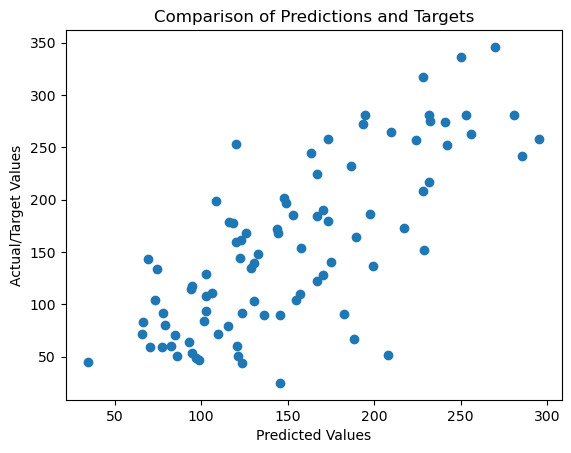

In [62]:
plt.scatter(predictions, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual/Target Values')
plt.title('Comparison of Predictions and Targets')
plt.show()

In [63]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 42.434277522023706
MSE 2778.5838755307404
RMSE 52.7122744294983


California Housing dataset
- Data Set Characteristics:

- Number of Instances: 20640

- Number of Attributes: 8 numeric, predictive attributes and the target

- Attribute Information: MedInc median income in block group

- HouseAge median house age in block group

- AveRooms average number of rooms per household

- AveBedrms average number of bedrooms per household

- Population block group population

- AveOccup average number of household members

- Latitude block group latitude

- Longitude block group longitude

- Missing Attribute Values: None

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surpinsingly large values for block groups with few households and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

References

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297

In [64]:
from sklearn.datasets import fetch_california_housing
# load dataset 
california = fetch_california_housing()
type(california)

sklearn.utils.Bunch

In [65]:
# print the feature names
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [66]:
# print the data shape
print(california.data.shape)

(20640, 8)


In [67]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [68]:
df = pd.DataFrame(california.data, columns=california.feature_names)

In [69]:
df.head() 

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [71]:
df['target'] = california.target
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [72]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[california.feature_names], df['target'], test_size=0.2, random_state=101)

In [73]:
X_train

MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  \
6560    4.7269      48.0   6.975275   1.167582       930.0  2.554945   
1071    2.2621      43.0   5.314286   1.069643      1181.0  2.108929   
11749   4.1685      20.0   6.700637   1.178344       745.0  2.372611   
13991   3.6343      28.0   6.861004   1.185328       721.0  2.783784   
17310  11.7794      39.0  14.666667   1.809524        59.0  2.809524   
...        ...       ...        ...        ...         ...       ...   
5695    4.6852      34.0   5.332599   1.046256      1232.0  2.713656   
8006    4.6429      36.0   6.089172   1.012739       416.0  2.649682   
17745   6.1463       6.0   7.181263   1.138493      1378.0  2.806517   
17931   3.2813      36.0   3.943128   1.000000       545.0  2.582938   
13151   2.6719      23.0   5.159754   1.113671      1862.0  2.860215   

       Latitude  Longitude  
6560      34.19    -118.13  
1071      39.74    -121.84  
11749     38.80    -121.15  
13991     34.96    -117.08  
17310     34.35    -119.50  
...         ...        ...  
5695      34.23    -118.25  
8006      33.85    -118.10  
17745     37.30    -121.76  
17931     37.35    -121.95  
13151     36.85    -121.53  

[16512 rows x 8 columns]

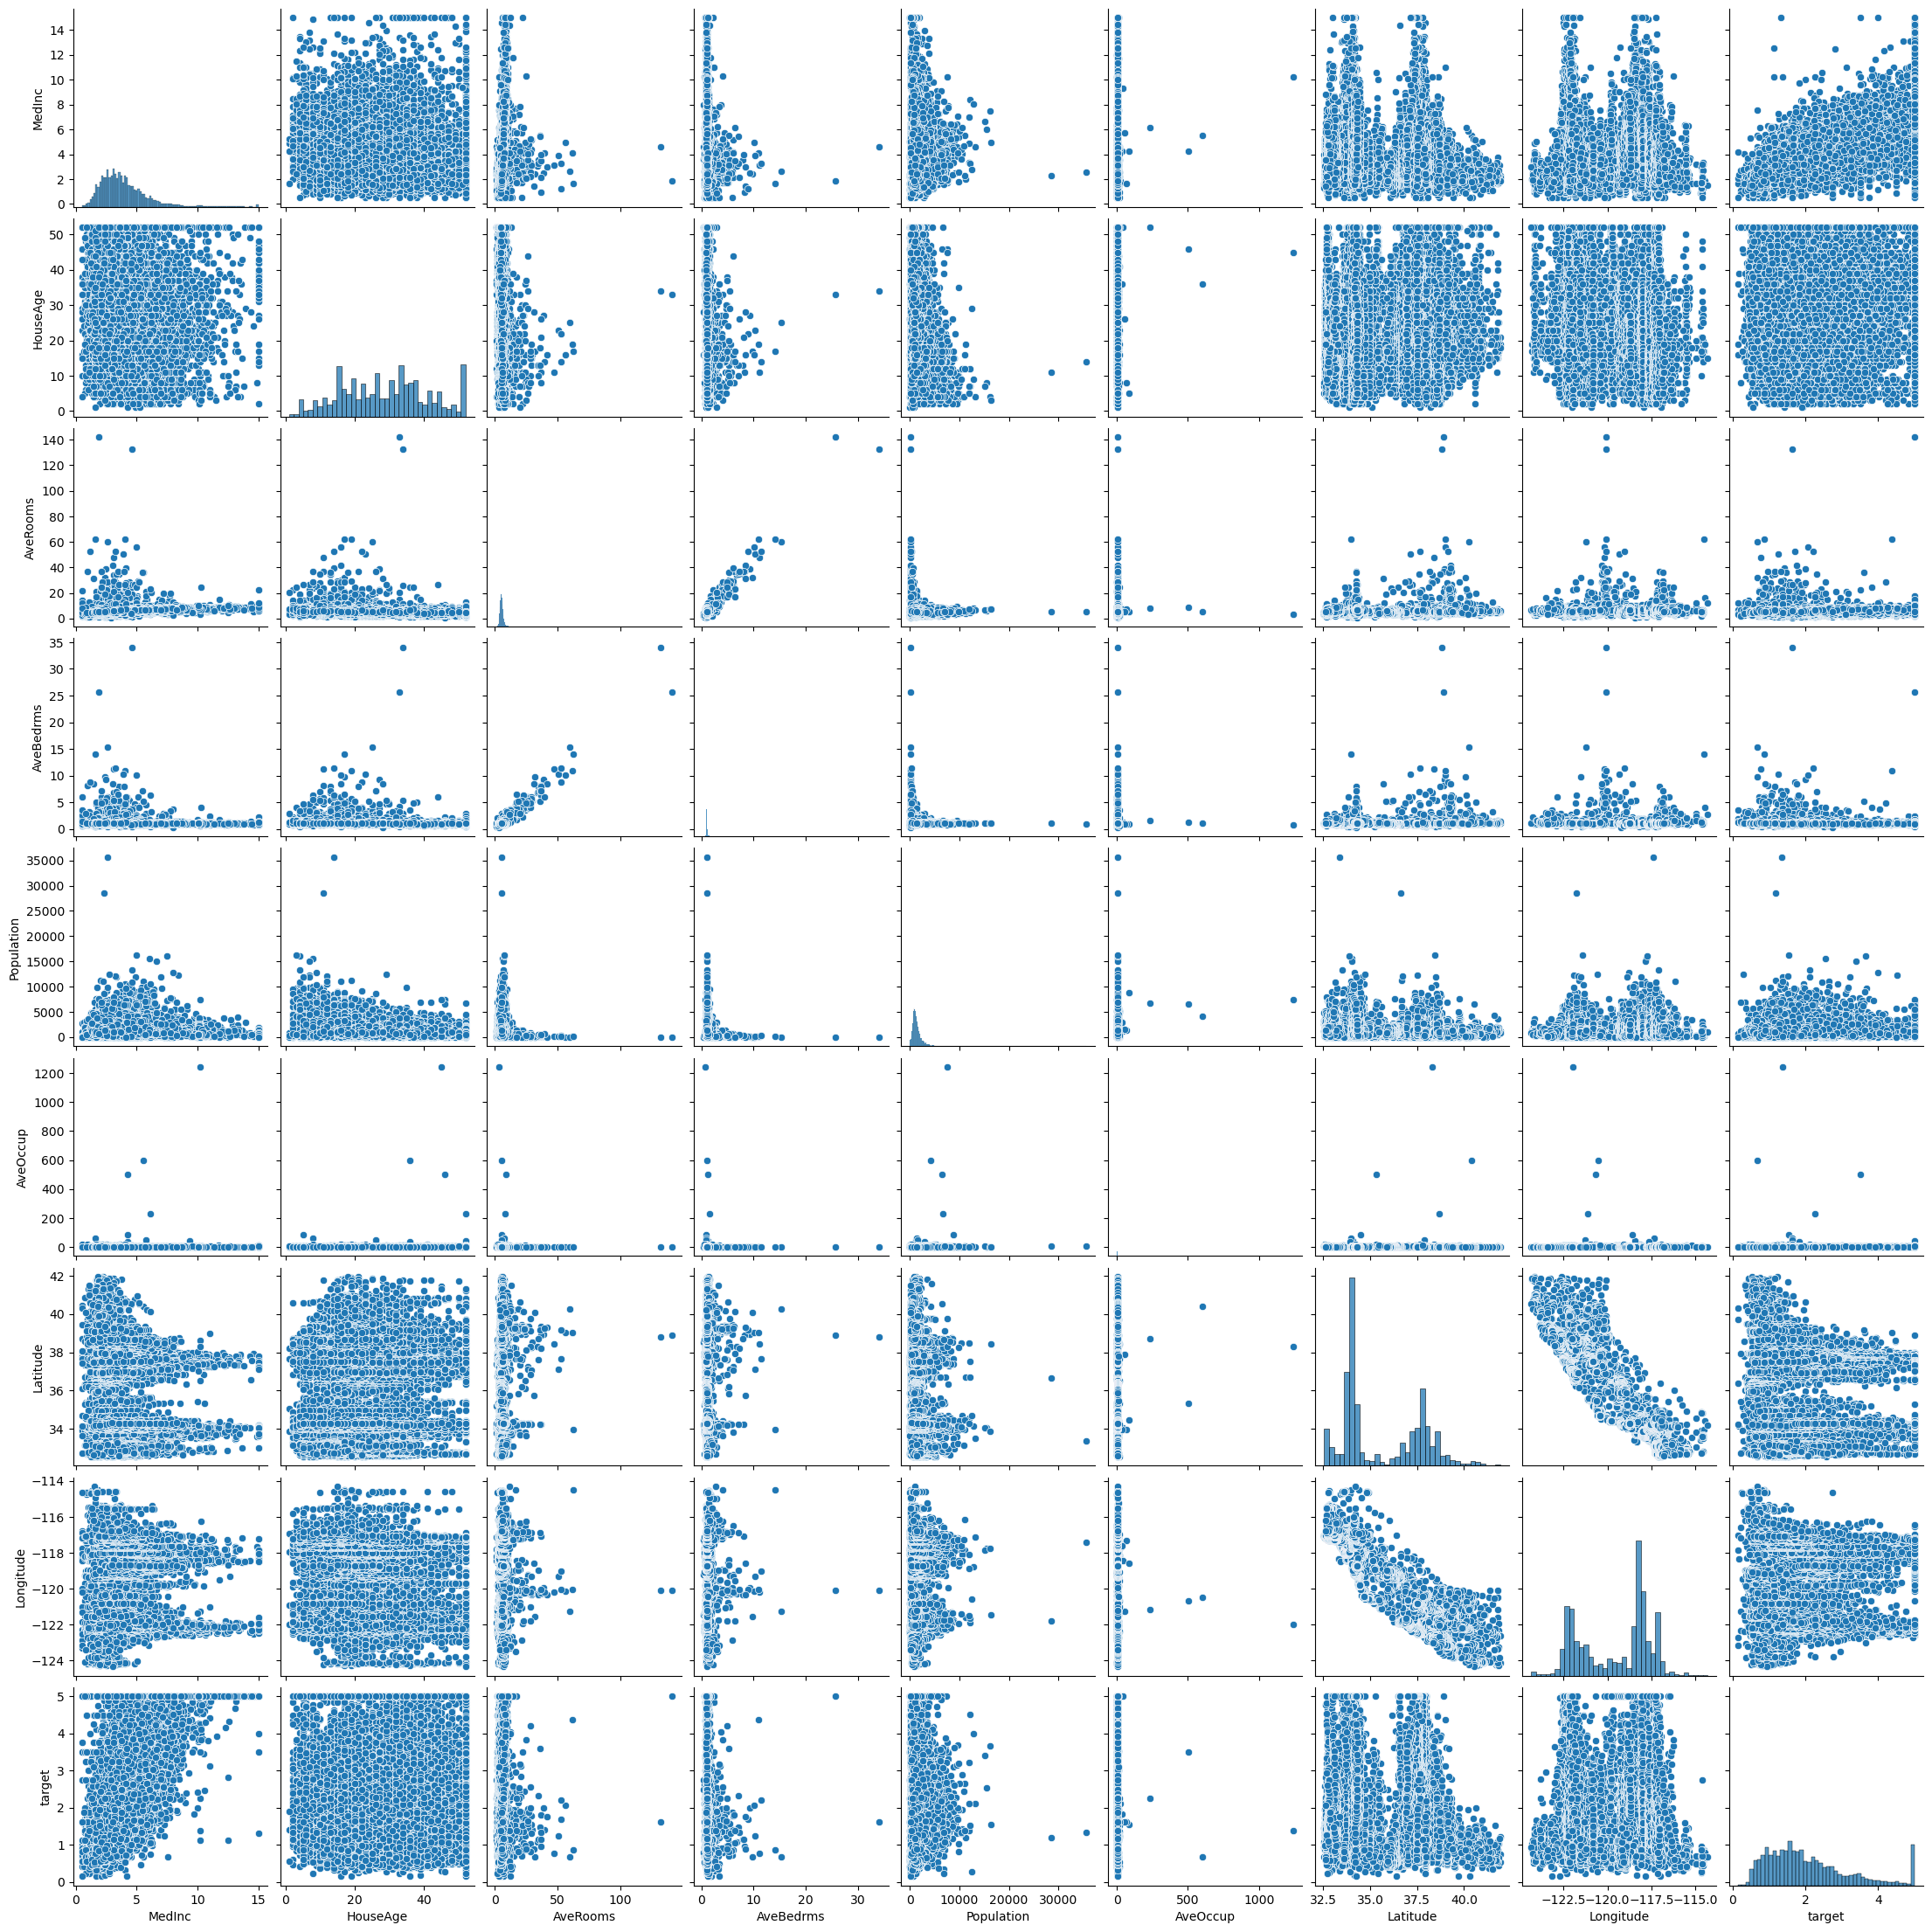

In [74]:
sns.pairplot(df)

<AxesSubplot:>

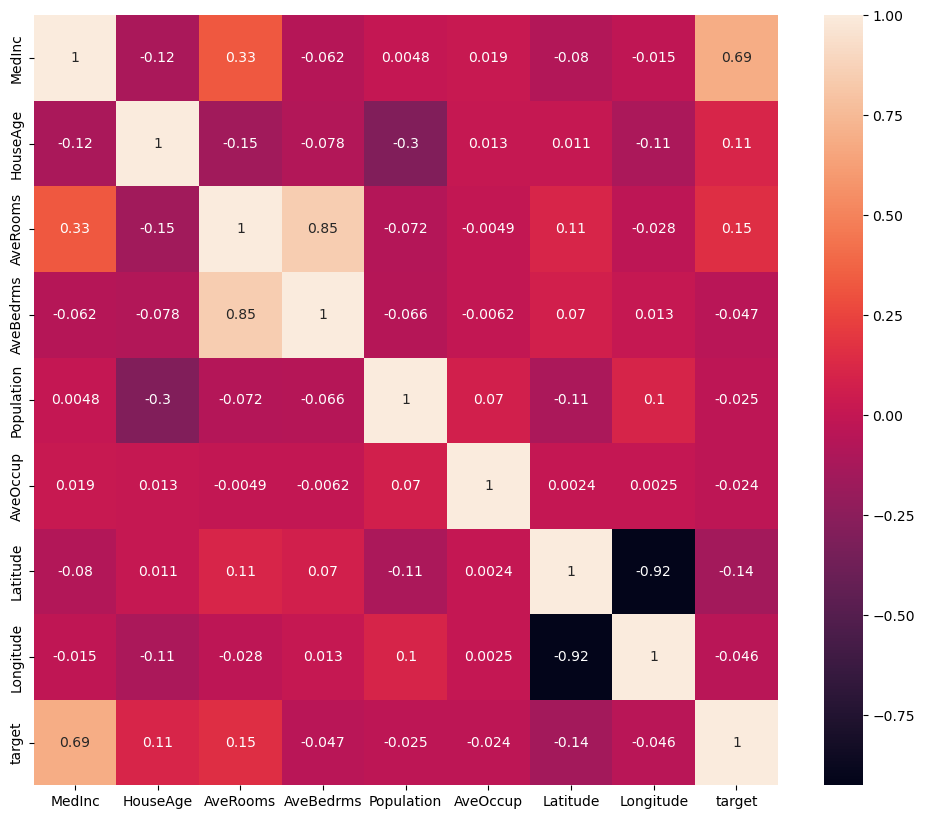

In [75]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
mdl = LinearRegression()

In [78]:
mdl.fit(X_train, y_train)

LinearRegression()

In [79]:
print(mdl.intercept_)

-36.41535507646463


In [80]:
coef_df = pd.DataFrame(mdl.coef_, X_train.columns, columns = ['Coefficient'])
coef_df

Coefficient
MedInc         0.435943
HouseAge       0.009662
AveRooms      -0.107191
AveBedrms      0.604821
Population    -0.000004
AveOccup      -0.004109
Latitude      -0.415464
Longitude     -0.428700

In [81]:
predictions = mdl.predict(X_test)

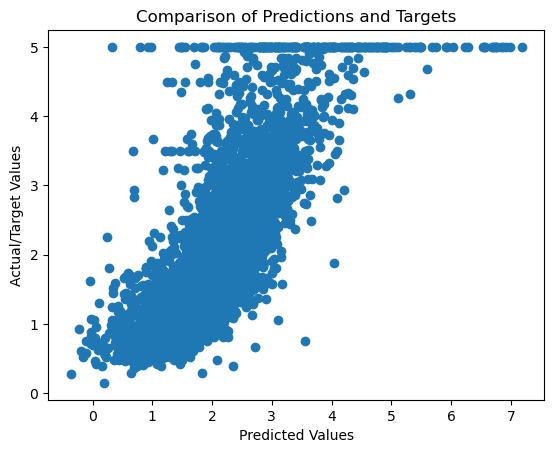

In [82]:
plt.scatter(predictions, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual/Target Values')
plt.title('Comparison of Predictions and Targets')
plt.show()

In [83]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 0.5379335579317653
MSE 0.5446775996844714
RMSE 0.7380227636627961
